<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_%EA%B0%9C%EC%A0%952%ED%8C%90_ch9_1~4_p_584_601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추천시스템

## 01. 추천 시스템의 개요와 배경

- **추천 시스템의 중요성**  
  오늘날 전자상거래(아마존), 콘텐츠 플랫폼(유튜브, 애플 뮤직 등)은 추천 시스템을 통해 사용자 맞춤 콘텐츠를 제공하고, 사이트 체류 시간을 늘리기 위해 노력하고 있음

- **추천 시스템의 효과**  
  추천 시스템 도입으로 기업은 매출을 증가시키고, 사용자는 더욱 즐거운 쇼핑/콘텐츠 경험을 할 수 있음. 추천 시스템은 사용자 취향을 반영하거나, 숨겨진 취향까지 찾아줌

## 추천 시스템의 유형


- **추천 방식의 분류**
  - **콘텐츠 기반 필터링 (Content-based Filtering)**  
    사용자가 이전에 선호했던 아이템의 특징을 분석해 유사한 콘텐츠 추천
  
  - **협업 필터링 (Collaborative Filtering)**  
    다른 사용자들의 행동 데이터를 바탕으로 추천. 두 가지 방식으로 나뉨:
    - **최근접 이웃 방식 (Nearest Neighbor)**  
      비슷한 사용자를 찾아 그들의 선호를 기반으로 추천
    - **잠재 요인 방식 (Latent Factor, Matrix Factorization)**  
      사용자와 아이템을 행렬로 표현하고 이를 분해해 숨겨진 패턴(잠재 요인)을 기반으로 추천. 넷플릭스 경연 대회 우승 모델이 이 방식

- **실제 적용 예**
  - **아마존:** 아이템 기반 최근접 이웃 협업 필터링 사용
  - **대부분의 온라인 플랫폼:** 잠재 요인 협업 필터링 적용

- **하이브리드 방식**
  - 콘텐츠 기반 + 협업 필터링 결합
  - 추천의 정확성과 개인화 수준을 더욱 높이기 위한 현대적 접근 방식

## 02. 콘텐츠 기반 필터링 추천 시스템

- **정의**  
  사용자가 선호한 아이템의 '콘텐츠 특징(속성)'을 분석하여, 유사한 속성을 가진 다른 아이템을 추천하는 방식

- **특징**
  - 아이템의 메타데이터(장르, 감독, 키워드 등)를 활용
  - 사용자의 이전 평가 기록에 기반하여 개인화된 추천 제공

- **장점**
  - 사용자의 명확한 취향을 반영한 추천 가능
  - 새로운 사용자에게도 빠르게 추천 가능 (아이템 콘텐츠 정보만 알면 됨)

- **단점**
  - 사용자가 평가한 콘텐츠와 유사한 범위에서만 추천되므로 다양성이 부족할 수 있음


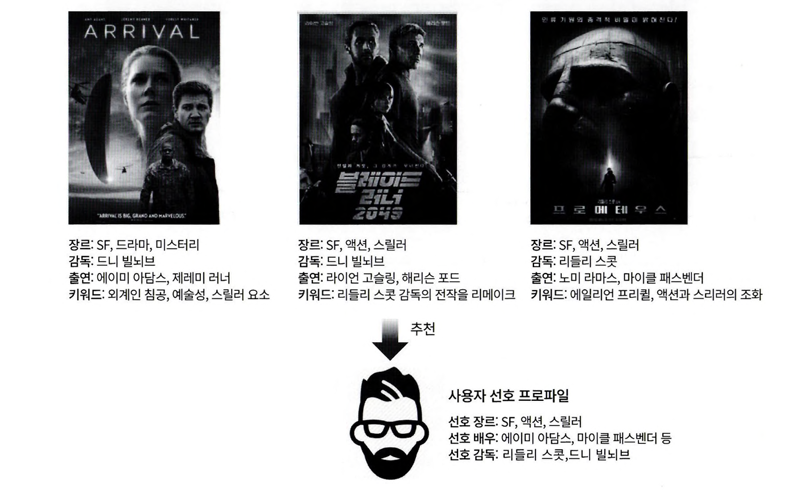

## 03. 최근접 이웃 협업 필터링 (User/Item-based Collaborative Filtering)

- **정의**  
  사용자들의 행동(평점, 클릭, 구매 등)을 바탕으로, 유사한 취향을 가진 사용자 또는 아이템을 찾아 추천하는 방식

- **예시 시나리오**  
  - 영화를 보기 전에 친구들의 평가를 참고하듯, 유사한 취향을 가진 다른 사용자들이 좋아한 영화를 추천받는 방식.
  - 예: 내가 본 영화 A, B를 어떤 다른 사용자도 좋아했으면, 그 사용자가 좋아한 영화 C도 나에게 추천

- **핵심 개념**
  - 사용자-아이템 평점 행렬(User-Item Rating Matrix)을 기반으로 함
  - 예측 평점(Predicted Rating)을 계산해 추천 제공
  - 사용자가 직접 평가하지 않은 아이템의 평점을 예측하여 추천

- **방식**
  - **User-based CF**: 나와 취향이 비슷한 '사용자'가 좋아한 아이템 추천
  - **Item-based CF**: 내가 좋아한 아이템과 유사한 아이템을 추천

- **데이터 전처리 팁**
  - 평점 데이터가 행(사용자)-열(아이템) 구조가 아닐 경우:
    ```python
    df.pivot_table(index='user_id', columns='item_id', values='rating')
    ```

- **장점**
  - 콘텐츠 정보 없이도 사용자 행동만으로 추천 가능.
  - 다양한 취향 반영이 가능하여 콘텐츠 기반보다 더 유연한 추천 가능.

- **단점**
  - 사용자-아이템 행렬에 평점이 적을 경우(희소성 문제) 정확도 저하
  - 신규 사용자나 아이템에 대한 정보가 부족하면 추천 어려움 (콜드 스타트 문제)


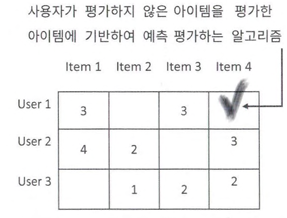

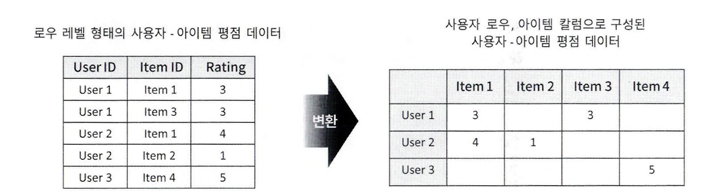

- **희소 행렬(Sparse Matrix) 문제**
  - 사용자들은 전체 아이템 중 일부에만 평점을 부여함 → 대부분의 셀이 비어 있음.
  - 이로 인해 계산이 어렵고 정확도가 떨어질 수 있음.

##최근접 이웃 협업 필터링 (Memory-Based CF)
사용자-아이템 평점 행렬을 메모리에 올려 유사도 기반으로 추천을 수행하므로 "Memory-Based"라고도 불림.



## 사용자 기반 (User-User CF)
> *"당신과 비슷한 고객들이 좋아한 아이템을 추천합니다."*

- **방식**:
  - 타 사용자와의 유사도(Similarity) 측정 (Cosine, Pearson 등)
  - 유사도 기준 Top-N 사용자 선정
  - 이들이 높게 평가한 아이템 중, 내가 아직 보지 않은 아이템을 추천

- **예시**:
  - A 사용자와 B 사용자의 영화 취향이 유사하다면, B가 좋아한 영화 중 A가 아직 안 본 영화를 A에게 추천



## 아이템 기반 (Item-Item CF)
> *"이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다."*

- **방식**:
  - 내가 평가한 아이템과 유사한 아이템을 찾아 추천
  - 아이템 간의 유사도 계산 (Cosine, Jaccard 등)
  - 내가 좋아한 아이템과 유사한 아이템을 추천 목록에 추가

- **예시**:
  - 내가 ‘인셉션’을 좋아했다면, ‘인터스텔라’도 추천



## 유사도(Similarity) 측정 방법
- **Cosine Similarity**: 벡터 간의 코사인 각도를 기반으로 유사도 측정
- **Pearson Correlation**: 상관계수 기반 유사도 측정 (사용자 취향 편차 보정)
- **Jaccard Similarity**: 이진 데이터(클릭 여부 등)에 유용



## 단점
- 희소한 데이터일 경우 추천 품질이 낮아질 수 있음
- 새로운 사용자나 아이템 등장 시 대응 어려움 (콜드 스타트 문제)
- 사용자의 수가 많을수록 실시간 계산에 부담 발생



## 장점
- 명시적 피드백(평점)만 있으면 가능 → 별도의 아이템 정보(장르 등)가 없어도 됨
- 구현이 비교적 간단하며 직관적

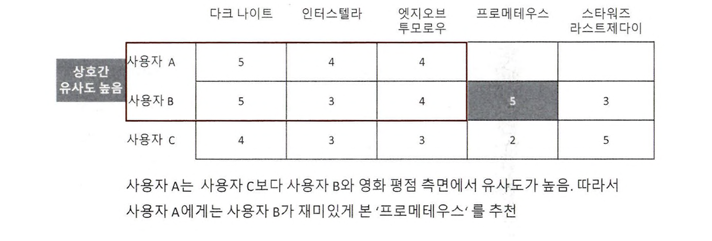

##  사용자 기반 vs 아이템 기반 협업 필터링 비교

| 기준 | 사용자 기반 (User-User CF) | 아이템 기반 (Item-Item CF) |
|------|-----------------------------|-----------------------------|
| 기준 | 사용자 간 유사도           | 아이템 간 유사도           |
| 예시 | "당신과 비슷한 고객이 본 영화" | "이 영화를 본 고객이 본 다른 영화" |
| 장점 | 개인 맞춤화가 더 직접적임    | 아이템 수가 많을 때 성능이 좋음 |
| 단점 | 사용자 수가 많으면 느려짐     | 신상품 등장 시 추천 어려움 |


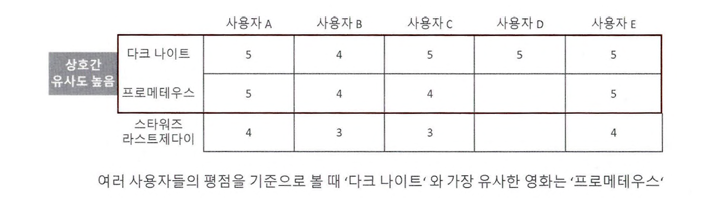


- 사용자 D가 ‘다크 나이트’를 매우 좋아함  
- ‘다크 나이트’와 ‘프로메테우스’는 사용자 평점 패턴이 매우 비슷함  
- 반면 ‘스타워즈-라스트 제다이’는 평점 패턴이 다소 다름  

👉 따라서 아이템 기반 협업 필터링은 D에게 ‘프로메테우스’를 추천

## 🤔 왜 아이템 기반이 사용자 기반보다 더 정확할까?

| 이유 | 설명 |
|------|------|
| ✅ 사용자 데이터는 적음 | 대부분의 사용자가 평가한 영화 수는 적음 |
| ✅ 취향 파악이 어려움 | 유명 영화는 모두 보기에 유사도 왜곡 발생 가능 |
| ✅ 아이템은 고정적 | 영화는 추가되지 않는 이상 변하지 않음 (비교 안정적) |
| ✅ 계산 효율성 | 사용자 수보다 아이템 수가 적거나, 아이템 간 관계 계산이 더 안정적임 |




## 📐 유사도 측정 – 코사인 유사도 (Cosine Similarity)

- 협업 필터링에서는 평점 행렬이 희소(sparse)하고 고차원이기 때문에
- 두 벡터의 방향을 비교하는 코사인 유사도를 가장 많이 사용함


##  잠재 요인 협업 필터링 (Latent Factor Collaborative Filtering)

-  **데이터 속에 숨어 있는 잠재 요인(Latent Factor)** 을 꺼내는 방식
- 사용자-아이템 평점 행렬 속 숨겨진 패턴을 발견하는 **행렬 분해(Matrix Factorization)** 기반 추천 기법



##  핵심 개념: 행렬 분해(Matrix Factorization)

- 대표적인 기법: **SVD (Singular Value Decomposition)**, **ALS (Alternating Least Squares)** 등
- **대규모 희소 행렬**인 사용자-아이템 평점 행렬을 두 개의 저차원 행렬로 분해:
  - 사용자-잠재 요인 행렬 (User × Factor)
  - 아이템-잠재 요인 행렬 (Item × Factor)
- 이 두 행렬의 내적을 통해 **예측 평점**을 계산

```python
# 예시: 사이킷런 TruncatedSVD 사용
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20)  # 잠재 요인 20개로 설정
latent_matrix = svd.fit_transform(rating_matrix)  # 사용자 × 잠재 요인 행렬


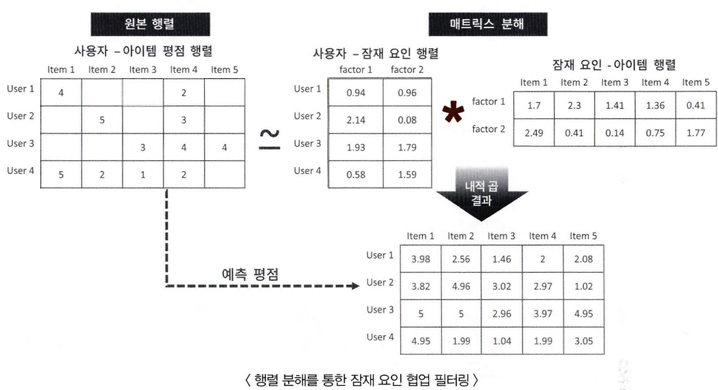

## 잠재 요인(Latent Factor)이란?

- **정확히 어떤 특성을 의미하는지 명확히 알 수는 없지만**, 예를 들어 영화 평점 기반 사용자-아이템 행렬이라면 다음처럼 가정할 수 있습니다:
  - 사용자-잠재 요인 행렬 `P`: **사용자의 영화 장르별 선호도**
  - 아이템-잠재 요인 행렬 `Q`: **영화의 장르별 특성값**



## 사용자-아이템 평점 행렬 `R`

- `R(u, i)`: 사용자 `u`가 아이템 `i`에 부여한 평점
- 예:
  - `R(1, 1) = 4`점
  - `R(1, 4) = 2`점

## 사용자-잠재 요인 행렬 `P`

- `P(u, f)`: 사용자 `u`의 `f`번째 잠재 요인에 대한 선호도
- 예시 (잠재 요인을 장르라고 가정):
  - `factor 1 = 액션 (Action)`
  - `factor 2 = 로맨스 (Romance)`
- 예:
  - `P(1, 1) = 0.94` (User 1의 액션 선호도)
  - `P(1, 2) = 0.96` (User 1의 로맨스 선호도)

## 아이템-잠재 요인 행렬 `Q`

- `Q(i, f)`: 아이템 `i`의 `f`번째 장르 특성값
- `Q`는 **내적을 위해 전치행렬** `Qᵀ`로 사용됨 (즉, `Qᵀ(f, i) = Q(i, f)`)
- 예:
  - `Qᵀ(1, 1) = 1.7` (Item 1의 액션 요소)
  - `Qᵀ(2, 1) = 2.49` (Item 1의 로맨스 요소)



## 예측 평점 계산

```math
\hat{R}(u, i) = P(u, :) \cdot Q(i, :)^T


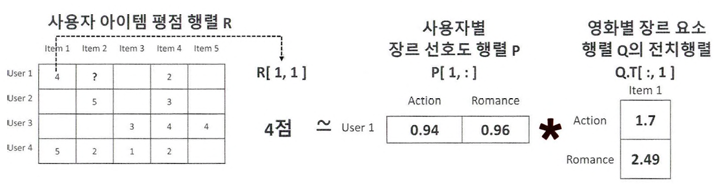

- 평점 예측 = 사용자 선호도 벡터(P) ⋅ 아이템 특성 벡터(Q.T)
- P: 사용자-잠재요인 행렬 (ex. 장르 선호도)
- Q: 아이템-잠재요인 행렬 (ex. 장르 특성)
- R(1,1) = 4 → P(1,:) ⋅ Q.T(:,1)
- R(1,2) 예측값 = 2.56 → P(1,:) ⋅ Q.T(:,2)


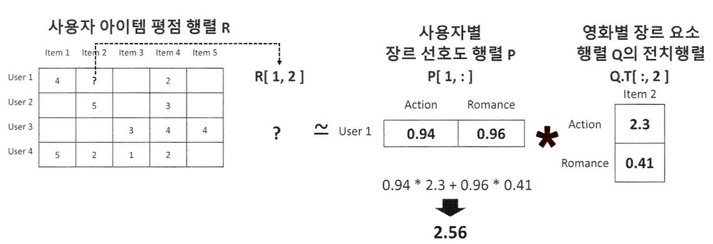

### 행렬 분해의 이해

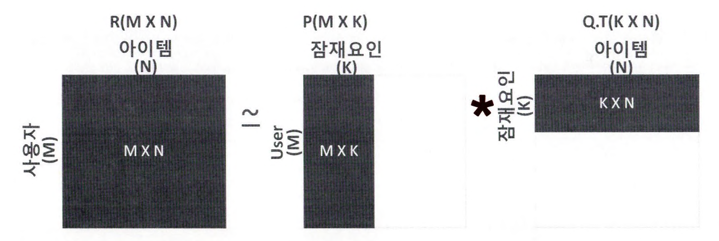

- R = P × Q.T

### 기호 설명
- M: 총 사용자 수
- N: 총 아이템 수
- K: 잠재 요인 차원 수

### 행렬 차원
- R: M × N (사용자-아이템 평점 행렬)
- P: M × K (사용자-잠재 요인 행렬)
- Q: N × K (아이템-잠재 요인 행렬)
- Q.T: K × N (Q의 전치 행렬)


## 확률적 경사 하강법을 이용한 행렬 분해 요약

### 목적
- P와 Q 행렬을 반복적으로 업데이트하여 예측 R 행렬과 실제 R 행렬 간의 오류 최소화

### 절차
1. P(M×K), Q(N×K)를 임의의 값으로 초기화
2. P × Q.T로 예측 행렬 R' 계산
3. 실제 R과의 오류 e(u,i) = R(u,i) - R'(u,i) 계산
4. 아래 식으로 P와 Q를 반복적으로 업데이트
5. 오류가 충분히 작아질 때까지 2~4 반복

### 비용 함수 (L2 규제 포함)
- ![cost](https://latex.codecogs.com/png.image?\dpi{110}&space;\sum_{(u,i)\in\kappa}(R_{ui}&space;-&space;P_u\cdot&space;Q_i^T)^2&space;+&space;\lambda(||P_u||^2&space;+&space;||Q_i||^2))

### P, Q 업데이트 식
- P_u ← P_u + η × (e(u,i) × Q_i - λ × P_u)
- Q_i ← Q_i + η × (e(u,i) × P_u - λ × Q_i)

### 각 기호 설명
- R: 실제 사용자-아이템 평점 행렬 (M×N)
- P: 사용자-잠재요인 행렬 (M×K)
- Q: 아이템-잠재요인 행렬 (N×K)
- Q.T: Q의 전치 행렬 (K×N)
- η: 학습률
- λ: L2 규제 계수
- e(u,i): 실제 평점과 예측 평점의 차이
- P_u: 사용자 u의 잠재요인 벡터
- Q_i: 아이템 i의 잠재요인 벡터 (전치 전 기준)


In [2]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])
num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [3]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

- SGD 기반으로 행렬 분해를 수행

In [4]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [(i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i, :], Q[j, :].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
    Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0:
      print("### iteration step : ", step, " rmse : ", rmse)

### iteration step :  0  rmse :  3.261355059488935
### iteration step :  0  rmse :  3.26040057174686
### iteration step :  0  rmse :  3.253984404542389
### iteration step :  0  rmse :  3.2521583839863624
### iteration step :  0  rmse :  3.252335303789125
### iteration step :  0  rmse :  3.251072196430487
### iteration step :  0  rmse :  3.2492449982564864
### iteration step :  0  rmse :  3.247416477570409
### iteration step :  0  rmse :  3.241926055455223
### iteration step :  0  rmse :  3.2400454107613084
### iteration step :  0  rmse :  3.240166740749792
### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.5003190892212748
### iteration step :  50  rmse :  0.5001616291326989
### iteration step :  50  rmse :  0.49899601202578087
### iteration step :  50  rmse :  0.4988483450145831
### iteration step :  50  rmse :  0.49895189256631756
### iteration step :  50  rmse :  0.49833236830090993
### iteration step :  50  rmse :  0.4984148489378701
### iterati

- 분해된 P와 Q 함수를 P*Q.T로 예측 행렬을 만들어서 출력

In [5]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
